<font size="4">Grant Polonis 


MSc Artificial Intelligence & Applications 
Big Data Technologies




09/11/2020


In [1]:
import matplotlib.pyplot as plt   #Import some useful libraries for interpretation
import pandas as pd
import seaborn as sns
import numpy as np

vg = pd.read_csv("vgsalesGlobale.csv") #Import the dataset. Here, we import data on Global Video Games Sales

In [2]:
vg.head() #Test that csv file has been imported & check columns

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


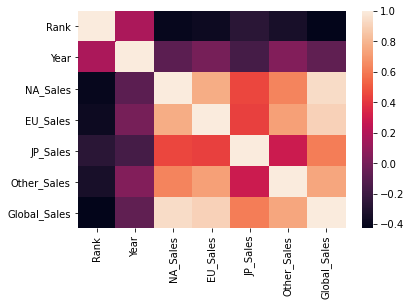

In [3]:
corr = vg.corr()
sns.heatmap(corr)
plt.show() #Produce a heatmap to show some initial correlations

In [4]:
print(vg.isnull().sum()) #Print the number of null values across the dataset
len(vg) #Print the number of items in the dataset

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


16598


<font size="4">As we can see here, there are 271 null values in column year, and 58 null values in column publisher. For data interpretation purposes, these values must be removed from the dataset.

In [5]:
#Get rid of all unusable null vales in the Dataset that may exist 
cleanvg = vg.dropna()
len(cleanvg)

16291

<font size="4">After executing the dropna command, we can see that the length of the Dataset has vastly reduced by 329 items, indicating the removal of null values

In [6]:
#Test that the removal of null values has worked - everything should return 0 to indicate 0 null values left
print(cleanvg.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64




<font size="4">Create Mean calculations and produce comparison bar chart to visualise respective markets sales figures</font>

In [7]:
NA_series = cleanvg['NA_Sales']
EU_series = cleanvg['EU_Sales']
JP_series = cleanvg['JP_Sales']
Other_series = cleanvg['Other_Sales']
Global_series = cleanvg['Global_Sales']

In [8]:
#To calculate mean sales of respective national markets

In [9]:
NA_mean = np.mean(NA_series)
EU_mean = np.mean(EU_series)
JP_mean = np.mean(JP_series)
Other_mean = np.mean(Other_series)
Global_mean = np.mean(Global_series)
print('NA mean = ', NA_mean ,' \nEU mean =  ', EU_mean, ' \nJP mean = ', JP_mean, ' \nOther mean = ', Other_mean, ' \nGlobal sales mean = ', Global_mean)

NA mean =  0.2656466760788366  
EU mean =   0.14773126266039754  
JP mean =  0.07883309802958094  
Other mean =  0.048426124854206894  
Global sales mean =  0.5409103185808628


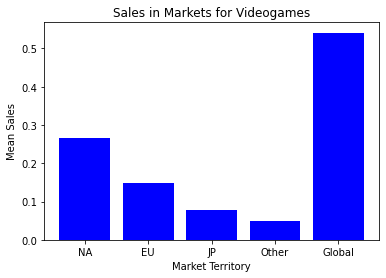

In [10]:
means = [NA_mean,EU_mean,JP_mean,Other_mean,Global_mean]
markets = ['NA','EU', 'JP', 'Other', 'Global']
plt.bar(markets, means, color='blue')
plt.xlabel("Market Territory")
plt.ylabel("Mean Sales")
plt.title("Sales in Markets for Videogames")

plt.show()

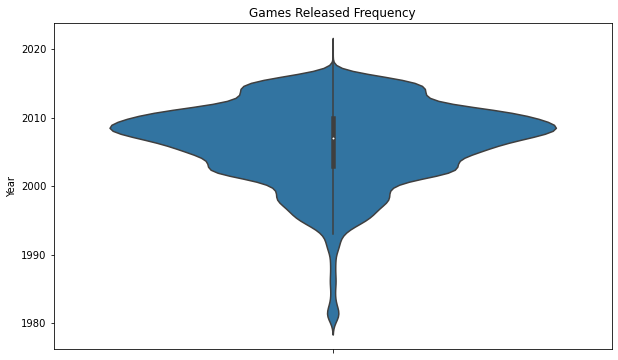

In [11]:
plt.figure(figsize=(10,6))
plt.title("Games Released Frequency")
sns.axes_style("dark")
sns.violinplot(y=cleanvg["Year"])
plt.show()

In [12]:
genres = cleanvg.groupby(['Genre']) #Group the types of games all together
len(genres) #Print out how many genres in Dataset (expected: 12)

12

In [13]:
print(list(genres)) #Test to see if games have been grouped by Genre correctly

[('Action',         Rank                                               Name Platform  \
16        17                                 Grand Theft Auto V      PS3   
17        18                      Grand Theft Auto: San Andreas      PS2   
23        24                                 Grand Theft Auto V     X360   
24        25                        Grand Theft Auto: Vice City      PS2   
38        39                               Grand Theft Auto III      PS2   
...      ...                                                ...      ...   
16564  16567      Original Frisbee Disc Sports: Ultimate & Golf       DS   
16567  16570  Fujiko F. Fujio Characters: Great Assembly! Sl...      3DS   
16582  16585                                    Planet Monsters      GBA   
16583  16586                                     Carmageddon 64      N64   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

         Year   Genre                  Publisher  NA_Sales  EU_Sales  \
16 

In [14]:
#As retrieved above, the genres in the Dataset are: 
#Action, Adventure, Fighting, Misc, Platform, Puzzle, Racing, Role-playing, Shooter, Simulation, Sports, Strategy.
#Re-assign Dataframe cleanvg to vg

vg = cleanvg

def genre_sales_average_NA():
    genreslist = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
    listna = []
    for title in genreslist:
        vg2 = vg[vg['Genre']==title]
        performance_genre = (sum((vg2['NA_Sales'])/ len(vg2['NA_Sales']))) #How do i get this to relate to each genre????
        listna.append([title, performance_genre])
    print ('NA genre sales averages (by millions of copies) are: ')
    return listna

    

genre_sales_average_NA()

NA genre sales averages (by millions of copies) are: 


[['Action', 0.26507843740388554],
 ['Adventure', 0.08000784929356342],
 ['Fighting', 0.26404306220095614],
 ['Misc', 0.2354211150652434],
 ['Platform', 0.5097028571428569],
 ['Puzzle', 0.21405263157894722],
 ['Racing', 0.29137142857142667],
 ['Role-Playing', 0.2221088435374155],
 ['Shooter', 0.448642745709826],
 ['Simulation', 0.21436320754716978],
 ['Sports', 0.2908376736111095],
 ['Strategy', 0.10123880597014882]]

In [15]:
#Now that we have quantifiable figures of genre popularities in the central (NA) market,
#lets find the same for the remaining markets:

def genre_sales_average_EU():
    genreslist = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
    listeu = []
    for title in genreslist:
        vg2 = vg[vg['Genre']==title]
        performance_genre = (sum((vg2['EU_Sales'])/ len(vg2['EU_Sales'])))
        listeu.append([title, performance_genre])
    print ('EU genre sales averages (by millions of copies) are: ')
    return listeu



genre_sales_average_EU()

EU genre sales averages (by millions of copies) are: 


[['Action', 0.15886804060289708],
 ['Adventure', 0.050031397174254276],
 ['Fighting', 0.11961722488038226],
 ['Misc', 0.12560498220640617],
 ['Platform', 0.2293142857142855],
 ['Puzzle', 0.08863157894736884],
 ['Racing', 0.1929061224489776],
 ['Role-Playing', 0.12759863945578304],
 ['Shooter', 0.24216068642745467],
 ['Simulation', 0.13327830188679285],
 ['Sports', 0.16117187499999613],
 ['Strategy', 0.0669253731343281]]

In [16]:
def genre_sales_average_JP():
    genreslist = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
    listjp = []
    for title in genreslist:
        vg2 = vg[vg['Genre']==title]
        performance_genre = (sum((vg2['JP_Sales'])/ len(vg2['JP_Sales'])))
        listjp.append([title, performance_genre])
    print ('JP genre sales averages (by millions of copies) are: ')
    return listjp

genre_sales_average_JP()

JP genre sales averages (by millions of copies) are: 


[['Action', 0.048800369117194486],
 ['Adventure', 0.04080847723704874],
 ['Fighting', 0.10424641148325339],
 ['Misc', 0.06326809015421121],
 ['Platform', 0.1493142857142858],
 ['Puzzle', 0.09943859649122815],
 ['Racing', 0.046212244897959276],
 ['Role-Playing', 0.23829251700680332],
 ['Shooter', 0.029781591263650636],
 ['Simulation', 0.07492924528301871],
 ['Sports', 0.05848958333333351],
 ['Strategy', 0.07328358208955195]]

In [17]:
def genre_sales_average_Other():
    genreslist = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
    listother = []
    for title in genreslist:
        vg2 = vg[vg['Genre']==title]
        performance_genre = (sum((vg2['Other_Sales'])/ len(vg2['Other_Sales'])))
        listother.append([title, performance_genre])
    print ('Other genre sales averages (by millions of copies) are: ')
    return listother

genre_sales_average_Other()

Other genre sales averages (by millions of copies) are: 


[['Action', 0.056880959704706545],
 ['Adventure', 0.013108320251177334],
 ['Fighting', 0.043289473684210655],
 ['Misc', 0.04384341637010653],
 ['Platform', 0.05886857142857179],
 ['Puzzle', 0.02187719298245642],
 ['Racing', 0.06259591836734749],
 ['Role-Playing', 0.04039455782312845],
 ['Shooter', 0.07948517940717392],
 ['Simulation', 0.03698113207547159],
 ['Sports', 0.05757378472222351],
 ['Strategy', 0.016761194029850653]]

In [18]:
def genre_sales_average_Global():
    genreslist = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
    listglobal = []
    for title in genreslist:
        vg2 = vg[vg['Genre']==title]
        performance_genre = (sum((vg2['Global_Sales'])/ len(vg2['Global_Sales'])))
        listglobal.append([title, performance_genre])
    print ('Global genre sales averages (by millions of copies) are: ')
    return listglobal

genre_sales_average_Global()

Global genre sales averages (by millions of copies) are: 


[['Action', 0.5299415564441449],
 ['Adventure', 0.1841365777080035],
 ['Fighting', 0.531160287081337],
 ['Misc', 0.46848754448398544],
 ['Platform', 0.9475771428571423],
 ['Puzzle', 0.4249298245614035],
 ['Racing', 0.593273469387757],
 ['Role-Playing', 0.6284557823129339],
 ['Shooter', 0.8004680187207479],
 ['Simulation', 0.45988207547169846],
 ['Sports', 0.5682465277777754],
 ['Strategy', 0.25861194029850865]]

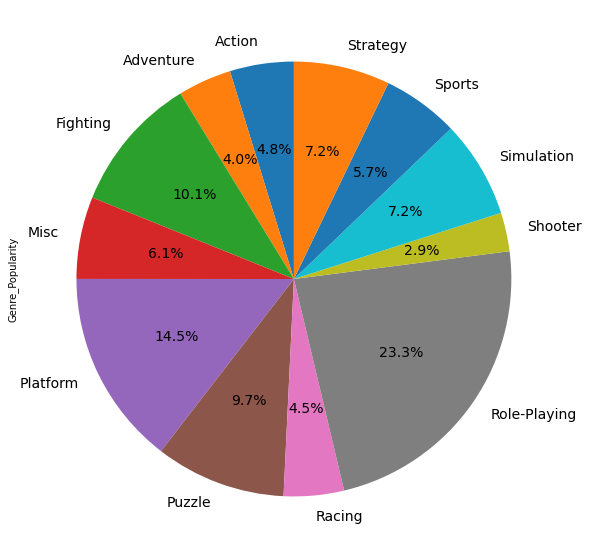

In [19]:
#Creating a pie chart visualiser for understanding popularity of game genres in the Japanese game market
from pandas.plotting import table #Useful library

#Pass in the values retrieved in the above function genre_sales_average_JP
game_data = {'Genre': ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing',
                      'Shooter', 'Simulation', 'Sports', 'Strategy'],
'Genre_Popularity':[0.048235826296742966, 0.04048989113530376,0.10300707547169795,0.061966647498562365,0.14759593679458274,
              0.09847079037800682,0.04538831064851873,0.23676747311827936, 0.02922137404580158,0.0734717416378318,
              0.0577024722932653, 0.07262848751835521]
        }
df = pd.DataFrame(game_data, columns = ['Genre', 'Genre_Popularity'])

plt.figure(figsize=(24,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'Genre_Popularity', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['Genre'], legend = False, fontsize=14)

In [20]:
years = vg.groupby(['Year'])
print(list(years)) #Oldest year of videogame recorded in Dataset is 1980, most recent year is 2020

[(1980.0,       Rank             Name Platform    Year     Genre   Publisher  NA_Sales  \
258    259        Asteroids     2600  1980.0   Shooter       Atari      4.00   
544    545  Missile Command     2600  1980.0   Shooter       Atari      2.56   
1766  1768          Kaboom!     2600  1980.0      Misc  Activision      1.07   
1969  1971         Defender     2600  1980.0      Misc       Atari      0.99   
2669  2671           Boxing     2600  1980.0  Fighting  Activision      0.72   
4025  4027       Ice Hockey     2600  1980.0    Sports  Activision      0.46   
5366  5368          Freeway     2600  1980.0    Action  Activision      0.32   
6317  6319           Bridge     2600  1980.0      Misc  Activision      0.25   
6896  6898         Checkers     2600  1980.0      Misc       Atari      0.22   

      EU_Sales  JP_Sales  Other_Sales  Global_Sales  
258       0.26       0.0         0.05          4.31  
544       0.17       0.0         0.03          2.76  
1766      0.07       0.0   

In [21]:
yearslist = vg['Year'].tolist() #Add years to a list
print (yearslist)

[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 2006.0, 2006.0, 2009.0, 1984.0, 2005.0, 2005.0, 1999.0, 2007.0, 2009.0, 2010.0, 2013.0, 2004.0, 1990.0, 2005.0, 2006.0, 1989.0, 1988.0, 2013.0, 2002.0, 2002.0, 2010.0, 2005.0, 2001.0, 2011.0, 1998.0, 2010.0, 2013.0, 2015.0, 2012.0, 2012.0, 2009.0, 2011.0, 2001.0, 2008.0, 2010.0, 2005.0, 2011.0, 2007.0, 2014.0, 2009.0, 1996.0, 2004.0, 2007.0, 2014.0, 1992.0, 2008.0, 1997.0, 2011.0, 2010.0, 2009.0, 2008.0, 1993.0, 2004.0, 2004.0, 2011.0, 2013.0, 2010.0, 1996.0, 2012.0, 2012.0, 1997.0, 2013.0, 2010.0, 1999.0, 2007.0, 1994.0, 2013.0, 2012.0, 2007.0, 2011.0, 1992.0, 2015.0, 2010.0, 2004.0, 2007.0, 2012.0, 2012.0, 2009.0, 1997.0, 2007.0, 2001.0, 1999.0, 2008.0, 1982.0, 2005.0, 2010.0, 2015.0, 2014.0, 1998.0, 1997.0, 1988.0, 2014.0, 2008.0, 2011.0, 2006.0, 2015.0, 2009.0, 2011.0, 2003.0, 1998.0, 1998.0, 2001.0, 2014.0, 2015.0, 2003.0, 2012.0, 2013.0, 2004.0, 2002.0, 2011.0, 1996.0, 2010.0, 2008.0, 2009.0, 2007.0, 2011.0, 2005.0, 2010.0, 2014.0,

In [22]:
#Now to remove the duplicate values from the year list
list_of_years = list(set(yearslist))
print (list_of_years)
print ('Number of years: ', len(list_of_years))

[1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0]
Number of years:  39


In [23]:
#Now to analyse the data to generate a visualisation of the average mean sales figures of games globally by year

def years_sales_average_global():
    listother = []
    for y in list_of_years:
        vg2 = vg[vg['Year']==y]
        performance_year = (sum((vg2['Global_Sales'])/ len(vg2['Global_Sales'])))
        listother.append([y, performance_year])
    print ('Yearly sales averages (by millions of copies) are: ')
    return listother

years_sales_average_global()
    

Yearly sales averages (by millions of copies) are: 


[[1980.0, 1.2644444444444445],
 [1981.0, 0.777608695652174],
 [1982.0, 0.8016666666666665],
 [1983.0, 0.9876470588235295],
 [1984.0, 3.5971428571428574],
 [1985.0, 3.8528571428571436],
 [1986.0, 1.765238095238095],
 [1987.0, 1.3587499999999997],
 [1988.0, 3.148],
 [1989.0, 4.3205882352941165],
 [1990.0, 3.0868749999999996],
 [1991.0, 0.7860975609756099],
 [1992.0, 1.7711627906976746],
 [1993.0, 0.7663333333333332],
 [1994.0, 0.654297520661157],
 [1995.0, 0.4023287671232878],
 [1996.0, 0.7572243346007614],
 [1997.0, 0.6954325259515576],
 [1998.0, 0.6767018469656976],
 [1999.0, 0.7434023668639068],
 [2000.0, 0.577535816618911],
 [2001.0, 0.6876970954356844],
 [2002.0, 0.4771049457177328],
 [2003.0, 0.46174193548387427],
 [2004.0, 0.5564650537634406],
 [2005.0, 0.48986111111110997],
 [2006.0, 0.5169047619047622],
 [2007.0, 0.5078434637801841],
 [2008.0, 0.47542016806722587],
 [2009.0, 0.46631726065688456],
 [2010.0, 0.47755767700875207],
 [2011.0, 0.45404929577465414],
 [2012.0, 0.5549465

Now to visualize this finding of average sales figures of videogame titles over the years, we must create a function below:

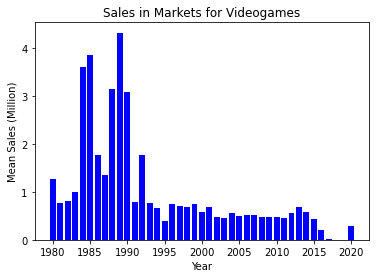

In [24]:
# Caculate the remaining accuracy and add some additional ones
#Declare variables for years' avg sales figures:
y1980 = 1.2644444444444445
y1981 = 0.777608695652174
y1982 = 0.8016666666666665
y1983 = 0.9876470588235295
y1984 = 3.5971428571428574
y1985 = 3.8528571428571436
y1986 = 1.765238095238095
y1987 = 1.3587499999999997
y1988 = 3.148
y1989 = 4.3205882352941165
y1990 = 3.0868749999999996
y1991 = 0.7860975609756099
y1992 = 1.7711627906976746
y1993 = 0.7663333333333332
y1994 = 0.654297520661157
y1995 = 0.4023287671232878
y1996 =  0.7572243346007614
y1997 = 0.6954325259515576
y1998 = 0.6767018469656976
y1999 = 0.7434023668639068
y2000 = 0.577535816618911
y2001 = 0.6876970954356844
y2002 = 0.4771049457177328
y2003 = 0.46174193548387427
y2004 = 0.5564650537634406
y2005 = 0.48986111111110997
y2006 = 0.5169047619047622
y2007 = 0.5078434637801841
y2008 = 0.47542016806722587
y2009 = 0.46631726065688456
y2010 = 0.47755767700875207
y2011 = 0.45404929577465414
y2012 = 0.5549465648854979
y2013 = 0.6741941391941392
y2014 = 0.5810862068965537
y2015 = 0.43068403908794933
y2016 = 0.20730994152046753
y2017 = 0.016666666666666666
y2020 = 0.29

# store all accuracy in a list and create list of labels for graph
yearssales = [y1980,y1981,y1982,y1983,y1984,y1985,y1986,y1987,y1988,y1989,y1990,y1991,y1992,y1993,y1994,
              y1995,y1996,y1997,y1998,y1999,y2000,y2001,y2002,y2003,y2004,y2005,y2006,y2007,y2008,y2009,
              y2010,y2011,y2012,y2013,y2014,y2015,y2016,y2017,y2020]

years = [1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0,
         1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
         2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
         2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2020.0]
plt.bar(years, yearssales, color='blue')

plt.xlabel("Year")
plt.ylabel("Mean Sales (Million)")
plt.title("Sales in Markets for Videogames")

plt.show()

<font size="4">
    Supervised Method: KMeans Clustering:

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
import matplotlib.pyplot as plt   #Import some useful libraries for interpretation
import pandas as pd
import seaborn as sns
import numpy as np
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

vg = pd.read_csv("vgsalesGlobale.csv") #Import the dataset. Here, we import data on Global Video Games Sales
cvg = vg.dropna() 

In [26]:
print('Number of platforms in dataset: ', len(cvg.groupby('Platform')))
print('Number of genres in dataset: ', len(cvg.groupby('Genre')))
platforms = cvg.groupby('Platform')
platformslist = cvg['Platform'].tolist()
#Now to remove the duplicate values from the Platform list
list_of_platforms = list(set(platformslist))
print (list_of_platforms)


Number of platforms in dataset:  31
Number of genres in dataset:  12
['N64', 'PSV', 'PS', 'NG', 'PS3', 'DC', 'SNES', 'GG', 'NES', 'GB', 'PS2', 'WiiU', 'GEN', '2600', 'XOne', 'SAT', 'SCD', 'PC', '3DS', 'PSP', 'PCFX', 'GC', 'PS4', 'XB', 'WS', 'Wii', '3DO', 'GBA', 'DS', 'X360', 'TG16']


In [27]:
#Convert genres and platforms to numerical values

#Genre conversion
cvg['Genre'] = np.where( (cvg['Genre'] == "Action"), 1, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Adventure"), 2, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Shooter"), 3, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Misc"), 4, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Racing"), 5, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Platform"), 6, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Role-Playing"), 7, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Strategy"), 8, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Simulation"), 9 , cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Sports"), 10, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Puzzle"), 11, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Fighting"), 12, cvg['Genre'])

#Platform Conversion
cvg['Platform'] = np.where( (cvg['Platform'] == "3DS"), 1, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "Wii"), 2, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SNES"), 3, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "NES"), 4, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "WiiU"), 5, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "3DO"), 6, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SCD"), 7, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "WS"), 8, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GG"), 9 , cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PCFX"), 10, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS3"), 11, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "NG"), 12, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GB"), 13, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS2"), 14, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GEN"), 15, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SAT"), 16, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "X360"), 17, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GBA"), 18, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "DC"), 19, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "XOne"), 20, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GC"), 21, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "DS"), 22, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS"), 23, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "XB"), 24, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PSV"), 25, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "2600"), 26, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "TG16"), 27, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS4"), 28, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "N64"), 29 , cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PSP"), 30, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PC"), 31, cvg['Platform'])


cvg = cvg.drop(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Publisher', 'Rank'], axis = 1)
cvg.shape
cvg.head() #Test

,Platform,Year,Genre,Global_Sales
0,2,2006.0,10,82.74
1,4,1985.0,6,40.24
2,2,2008.0,5,35.82
3,2,2009.0,10,33.00
4,13,1996.0,7,31.37


<font size = 5> Now that our data is prepared, let's run a Hopkins test to see how well (or not) our data can be clustered:

In [28]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(cvg)

0.9926172982147432

<font size = 5> With the Hopkins value at 0.99... we can identify that the data available has a high tendency to cluster, and thus our method for supervised analysis is sound for use. Let's employ K-Means below:

In [ ]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cvg)
    sse_.append([k, silhouette_score(cvg, kmeans.labels_)])

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

In [ ]:
#Elbow plot to find optimal k for clustering
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(cvg)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [ ]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(cvg)

In [ ]:
# analysis of clusters formed
cvg.index = pd.RangeIndex(len(cvg.index)) 
cvg_km = pd.concat([cvg, pd.Series(model_clus5.labels_)], axis=1)
cvg_km.columns = ['Platform', 'Year', 'Genre', 'Global_Sales', 'ClusterID']
cvg_km[:30]

In [ ]:
plt.bar(cvg_km['ClusterID'], cvg_km['Global_Sales'], color='blue')

plt.xlabel("Cluster ID")
plt.ylabel("Global Sales Performance")
plt.title("Sales in Markets for Videogames")

plt.show()

<font size="4"> Supervised Algorithm: Linear Regression

In [ ]:
import statsmodels.formula.api as smf

cvg = vg.dropna()
cvg['Genre'] = np.where( (cvg['Genre'] == "Action"), 1, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Adventure"), 2, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Shooter"), 3, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Misc"), 4, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Racing"), 5, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Platform"), 6, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Role-Playing"), 7, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Strategy"), 8, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Simulation"), 9 , cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Sports"), 10, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Puzzle"), 11, cvg['Genre'])
cvg['Genre'] = np.where( (cvg['Genre'] == "Fighting"), 12, cvg['Genre'])

#Platform Conversion
cvg['Platform'] = np.where( (cvg['Platform'] == "3DS"), 1, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "Wii"), 2, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SNES"), 3, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "NES"), 4, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "WiiU"), 5, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "3DO"), 6, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SCD"), 7, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "WS"), 8, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GG"), 9 , cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PCFX"), 10, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS3"), 11, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "NG"), 12, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GB"), 13, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS2"), 14, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GEN"), 15, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "SAT"), 16, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "X360"), 17, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GBA"), 18, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "DC"), 19, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "XOne"), 20, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "GC"), 21, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "DS"), 22, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS"), 23, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "XB"), 24, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PSV"), 25, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "2600"), 26, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "TG16"), 27, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PS4"), 28, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "N64"), 29 , cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PSP"), 30, cvg['Platform'])
cvg['Platform'] = np.where( (cvg['Platform'] == "PC"), 31, cvg['Platform'])
cvg = cvg.drop(['Name', 'Other_Sales', 'Publisher', 'Rank'], axis = 1)


# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Global_Sales ~ JP_Sales', data=cvg)
model = model.fit()


In [ ]:
model.params

In [ ]:
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(cvg['JP_Sales'], cvg['Global_Sales'], 'o')           # scatter plot showing actual data
plt.plot(cvg['JP_Sales'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('JP Market Figures')
plt.ylabel('Global Videogame Sales')
plt.title('Japanese Market & Sales')

plt.show()

In [ ]:
#Re-do for NA Market Sales and Global Sales now
model = smf.ols('Global_Sales ~ NA_Sales', data=cvg)
model = model.fit()

In [ ]:
sales_pred = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(cvg['NA_Sales'], cvg['Global_Sales'], 'o')           # scatter plot showing actual data
plt.plot(cvg['NA_Sales'], sales_pred, 'r', linewidth=2)   # regression line
plt.xlabel('NA Market Figures')
plt.ylabel('Global Videogame Sales')
plt.title('North American Market & Sales')

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['NA_Sales', 'Genre']
X = cvg[predictors]
y = cvg['Global_Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [ ]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

In [ ]:
model.predict(X)

In [ ]:
new_X = [[300000, 10]]
print(model.predict(new_X))

<font size = 5> Testing LinReg Analysis

In [ ]:
# with statsmodels
import statsmodels.api as sm

#X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(cvg["Global_Sales"], cvg["NA_Sales"]).fit()
#predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

<font size = 5> Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cvg[["NA_Sales", "Genre"]],
                                                    cvg["Global_Sales"], test_size=0.3, random_state=6)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The Root Mean Squared Error
print('Root Mean Squared Error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(y_test, y_pred))

In [ ]:
#89% of the variance comes from the data avaible, meaning 89% of the global sales predicted comes from NA_Sales and 
#Genre, only 11% of results comes from other factors. 